# Week 5 Mini Project - Monet Painting Dataset

## 1. Introduction and Problem Description

In this project, we will practice building and training generative deep learning model using GAN model. The dataset generataes 7000 to 10000 monet-style images. I will build and evaluate a Generative Adversarial Network (GAN) model for generating images of handwritten digits. The competition provides a dataset of 28x28 monet-style images of handwritten digits and will generate similar images. It includes instructions for preprocessing the data, building and training the GAN model, and generating new images. 

The dataset and competition details can be found at the following link:

https://www.kaggle.com/competitions/gan-getting-started/overview

## 2. EDA Procedure
### Import Library

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape
from keras.layers import BatchNormalization, Dropout
from keras.layers import ReLU, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam

### Load Data

In [26]:
monet_directory = '../week5/monet_jpg/'
photo_directory = '../week5/photo_jpg/'

In [28]:
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

monet_jpg = getImagePaths(monet_directory)
photo_jpg = getImagePaths(photo_directory)

print(len(monet_jpg))
print(len(photo_jpg))

300
7038


In [16]:
BUFFER_SIZE = 60000
BATCH_SIZE = 32
IMAGE_SIZE = [256, 256]

feature_description = {
    'image_name': tf.io.FixedLenFeature([], tf.string),
    'image': tf.io.FixedLenFeature([], tf.string),
    'target': tf.io.FixedLenFeature([], tf.string)
}

def _parse_image_function(example_proto):
    example = tf.io.parse_single_example(example_proto, feature_description)
    image = tf.io.decode_jpeg(example['image'])
    image = (tf.cast(image, tf.float32) / 127.5) - 1.0
    image = tf.image.resize(image, IMAGE_SIZE)
    return image

In [17]:
monet_dataset = raw_monet_dataset.map(_parse_image_function)

### Visualization of examples

In [31]:
def visualization(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()
    


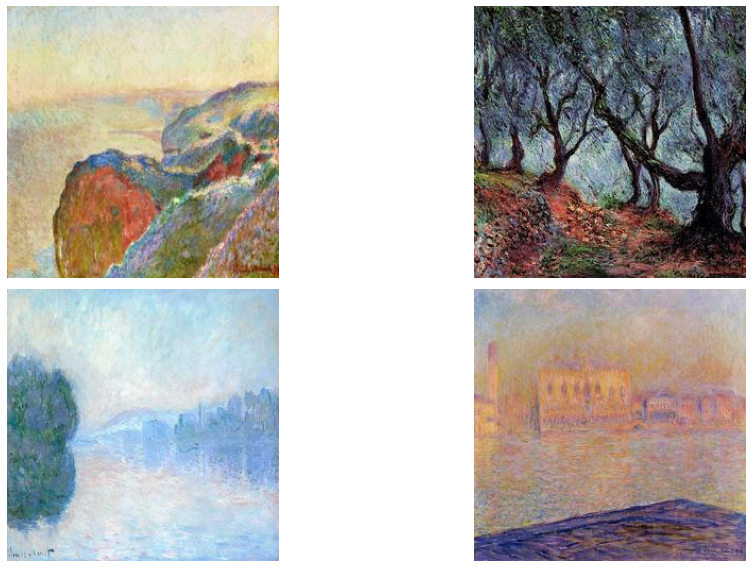

In [32]:
visualization(monet_jpg, 2, 2)

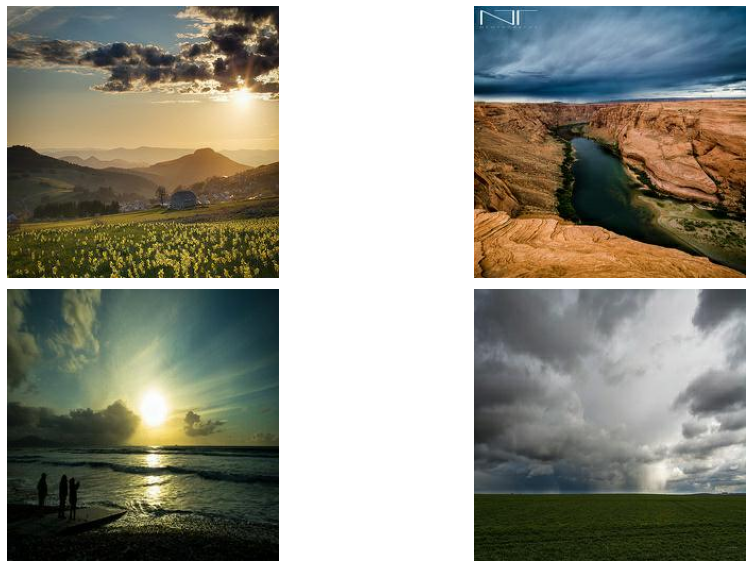

In [34]:
visualization(photo_jpg, 2, 2)

## 3. Build Model

### Build Generator

In [68]:
# Create a function to build the generator model:

def generator_model():
    initializer  = RandomNormal(mean = 0, stddev = 0.02)
    
    model = Sequential()
    
    model.add(Conv2D(filters = 64, kernel_size = (4, 4), strides = (2, 2), padding = 'same', use_bias = False, input_shape = [256, 256, 3], kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    #model.add(Reshape((8, 8, 512)))

    model.add(Conv2D(filters = 128, kernel_size = (4, 4), strides = (2, 2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())    
    model.add(Dropout(0.3))

    model.add(Conv2D(filters = 256, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))


    model.add(Conv2DTranspose(filters = 265, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2DTranspose(filters = 128, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    model.add(Conv2DTranspose(filters = 3, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    
    return model

### Build Discriminator Model

In [ ]:
# Create a function to build the discriminator model:

def discriminator_model():
    initializer  = RandomNormal(mean = 0, stddev = 0.02)
    model = Sequential()
    
    model.add(Conv2D(filters = 64, kernel_size = (4, 4), strides = (2,2), padding = 'same', input_shape = [256,256,3], kernel_initializer = initializer, use_bias = False))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters = 128, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters = 256, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(ReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters = 1, kernel_size = (4, 4), strides = (2,2), padding = 'same', use_bias = False, kernel_initializer = initializer))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    

    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))
    model.add(Flatten())
       
    return model

NameError: name 'generator_model' is not defined

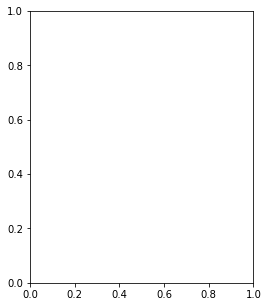

In [35]:
def generate_images(row = 1,col = 1, is_norm = False):
    plt.figure(figsize = (4*row, 5*col))    
    for ele in range(1,1+row*col):        
        noise = tf.random.normal([1, 256, 256, 3])
        plt.subplot(row, col, ele)
        if(is_norm):
            plt.imshow(generator_model(noise)[0, :, :, :]*255)
        else:            
            plt.imshow(generator_model(noise)[0, :, :, :]*0.5 + 0.5)
        plt.axis('off')
        
generate_images()